# <center> Predicting Customer Lifetime Value using Regression  </center>



| Feature | Description |
| --- | --- |
| Customer ID | Unique Id given to the customers|
| Customer.Lifetime.Value |  Target Variable |
| Coverage  | Basic + Extended + Premium |
| Gender  | Male or Female |
| Marital.Status | Single, Married or Divorced |
| Education | Bachelor, High School, Doctor, Master |
| Location.Geo  | Lattitude values |
| Location.Code | Rural Urban Surban |
| Monthly.Premium.Auto | Monthly Premium |
| Months.Since.Last.Claim | Months since last Claimed |
| Months.Since.Policy.Inception | Months since last incepcted |
| Number.of.Open.Complaints | how many complaints registered |
| Number.of.Policies | Bachelor, High School, Doctor, Master |
| EmploymentStatus  | 'Unemployed' 'Employed' 'Retired' 'Medical Leave' 'Disabled' |
| Policy  | 'PersonalL2, PersonalL1, CorporateL3' 'SpecialL2' 'PersonalL3''CorporateL1' 'CorporateL2''Special L3' 'Special L1'|
| Policy Type | Personal Corporate Special |
| Renew.Offer.Type | Offer1 Offer2 Offer3 Offer4 |
| Sales.Channel | Branch Agent Web Call Centre |
| Vehicle.Class | Class Type of vehicles |
| Vehicle.Size | 1 2 3 |


## Loading  the libraries

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the Dataset

In [5]:
df = pd.read_csv("C:/Users/TEC/Downloads/train-1574429526318.csv")
df.shape

(9806, 22)

There are a total of 9806 observations in the data set and 22 features. 

## Setting the Display option right.

In [170]:
def set_pandas_display_options() :

    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.precision = 3

    
    
set_pandas_display_options()


## Exploratory Data Analysis

Let us take a look at a portion of the data.

In [171]:
df.head()


,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.373,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214,Four-Door Car,2.0
1,2057,8005.965,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.509,SUV,2.0
2,4119,8646.504,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.819,SUV,1.0
3,1801,9294.089,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800,SUV,3.0
4,9618,5595.971,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600,Two-Door Car,3.0


In [9]:
df.describe()

,CustomerID,Customer.Lifetime.Value,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,9806.000000,9806.000000,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,9806.000000,9680.000000
mean,5778.381807,7998.047015,93.340657,15.143993,48.165001,0.379172,2.960351,438.266734,2.089773
std,3343.286093,6848.055899,34.417763,10.004327,27.963630,0.896427,2.389801,293.502301,0.538524
min,1.000000,1898.007675,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2879.250000,4013.949039,68.750000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000
50%,5783.000000,5780.182197,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000
75%,8678.750000,8960.280213,109.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000
max,11573.000000,83325.381190,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000


-We can see there are some missing terms in the data.  
  
-Majortiy of features have data in the 3rd Quartile i.e the 75% region.  

-Will do EDA for to check it clearly

In [10]:
df.describe(include = 'all')

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
count,9806.000000,9806.000000,8881,9677,9688,9677,9806,9806,9687,9677,...,9806.000000,8988.000000,9685.000000,8915,9685,9678,9678,9806.000000,9680,9680.000000
unique,NaN,NaN,3,5,5,2,4622,2840,3,3,...,NaN,NaN,NaN,3,9,4,4,NaN,6,NaN
top,NaN,NaN,Basic,Bachelor,Employed,F,0,"NA,NA",Suburban,Married,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,NaN
freq,NaN,NaN,5361,2934,6020,4985,2461,119,6204,5643,...,NaN,NaN,NaN,6620,3637,3975,3670,NaN,4869,NaN
mean,5778.381807,7998.047015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.165001,0.379172,2.960351,NaN,NaN,NaN,NaN,438.266734,NaN,2.089773
std,3343.286093,6848.055899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.963630,0.896427,2.389801,NaN,NaN,NaN,NaN,293.502301,NaN,0.538524
min,1.000000,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,1.000000
25%,2879.250000,4013.949039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,280.352767,NaN,2.000000
50%,5783.000000,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,384.007015,NaN,2.000000
75%,8678.750000,8960.280213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.750000,0.000000,4.000000,NaN,NaN,NaN,NaN,553.540973,NaN,2.000000


In [15]:
df['Customer.Lifetime.Value'].describe()


count     9806.000000
mean      7998.047015
std       6848.055899
min       1898.007675
25%       4013.949039
50%       5780.182197
75%       8960.280213
max      83325.381190
Name: Customer.Lifetime.Value, dtype: float64

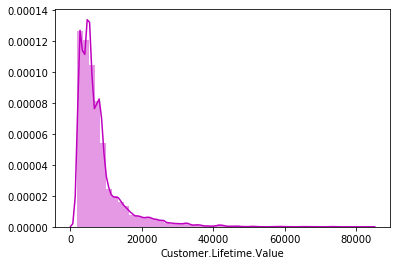

In [14]:
sns.distplot(df['Customer.Lifetime.Value'], color = "m")
plt.show()


The range of our target variable is from 1898 to 833.25.  

Its a right skwed data.

Let us check if all columns are in appropriate data format.

In [173]:
df.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                            object
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

<div class="alert alert-block alert-info"><b> 
    
-  All objects types are categorical.
- Income should be float or int  but it has read as object. This means there are some na_values .
</b></div>    

Let us check the value counts or unique values of income . 

- We need to convert the objects as categorical.
- we need to seperate the numerical and categorical variables


In [18]:
df['Income'].value_counts()

0        2461
?         118
28142      11
11828      11
20396      11
49078      10
22520      10
95697      10
31278      10
19864      10
74454      10
26802      10
22705      10
38713       9
93272       9
35482       9
11904       9
28215       9
56980       9
14290       9
24164       9
74015       9
18495       8
64801       8
21604       8
72540       8
70263       8
97131       8
40870       8
86305       8
         ... 
53787       1
37282       1
46143       1
41990       1
73976       1
23333       1
68164       1
17453       1
71176       1
87313       1
43324       1
30857       1
58776       1
27431       1
48259       1
42790       1
24149       1
80536       1
95140       1
98338       1
29593       1
37553       1
63357       1
83208       1
90252       1
87382       1
89285       1
56869       1
28248       1
33837       1
Name: Income, Length: 4622, dtype: int64

- We can see that there is ? in Income.
- we can remove that by adding na_values in our read file


In [175]:
df = pd.read_csv("C:/Users/TEC/Downloads/train-1574429526318.csv" , na_values = '?')


In [176]:
df.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

In [177]:
df['CustomerID'].nunique()

9806

In [23]:
df.set_index('CustomerID', inplace = True)


- As it only has unique values in the columns we can drop this


In [24]:
df.head()

,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
CustomerID,,,,,,,,,,,,,,,,,,,,,
5917,7824.372789,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,67.0,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
2057,8005.964669,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,101.0,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
4119,8646.504109,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,108.0,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
1801,9294.088719,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,116.0,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
9618,5595.971365,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,72.0,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


## Checking the NA values

To remove the NA values we will do imputation.

In [180]:
df.isnull().sum()

Customer.Lifetime.Value            0
Coverage                         925
Education                        129
EmploymentStatus                 118
Gender                           129
Income                           118
Location.Geo                       0
Location.Code                    119
Marital.Status                   129
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Policy.Type                      891
Policy                           121
Renew.Offer.Type                 128
Sales.Channel                    128
Total.Claim.Amount                 0
Vehicle.Class                    126
Vehicle.Size                     126
dtype: int64

## Feature Engineering


In [186]:
df['Months.Since.Policy.Inception'].describe()

count    9806.000
mean       48.165
std        27.964
min         0.000
25%        24.000
50%        48.000
75%        71.750
max        99.000
Name: Months.Since.Policy.Inception, dtype: float64

In [187]:
df['Months.Since.Last.Claim'].describe()

count    9806.000
mean       15.144
std        10.004
min         0.000
25%         6.000
50%        14.000
75%        23.000
max        35.000
Name: Months.Since.Last.Claim, dtype: float64

In [188]:
df['Months.Since.Last.Claim'].value_counts()

3     405
2     388
7     379
6     370
1     356
10    351
4     349
5     335
15    317
16    316
11    315
12    306
14    297
0     296
17    294
8     289
13    281
21    263
20    262
9     262
23    257
19    255
18    253
22    246
25    236
24    226
29    222
31    221
26    216
28    208
27    204
33    190
34    181
30    177
35    146
32    137
Name: Months.Since.Last.Claim, dtype: int64

## Binning

In [189]:
bins = [0,7,14,21,28,35]
grp = ["0-7","7-14","14-21","21-28", "28-35"]
df["Claim_cat"] = pd.cut(df["Months.Since.Last.Claim"],bins,labels= grp,include_lowest=True)
df.head()

,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Claim_cat
CustomerID,,,,,,,,,,,,,,,,,,,,,,
5917,7824.373,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214,Four-Door Car,2.0,0-7
2057,8005.965,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.509,SUV,2.0,21-28
4119,8646.504,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.819,SUV,1.0,0-7
1801,9294.089,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800,SUV,3.0,0-7
9618,5595.971,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600,Two-Door Car,3.0,0-7


In [190]:
df['Months.Since.Policy.Inception'].describe()

count    9806.000
mean       48.165
std        27.964
min         0.000
25%        24.000
50%        48.000
75%        71.750
max        99.000
Name: Months.Since.Policy.Inception, dtype: float64

In [191]:
bins = [0,25,50,75,100]
grp = ["0-25","25-50","50-75","75-100"]
df["Inception_cat"] = pd.cut(df["Months.Since.Policy.Inception"],bins,labels= grp,include_lowest=True)
df.head()

,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Claim_cat,Inception_cat
CustomerID,,,,,,,,,,,,,,,,,,,,,,,
5917,7824.373,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214,Four-Door Car,2.0,0-7,25-50
2057,8005.965,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.509,SUV,2.0,21-28,25-50
4119,8646.504,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.819,SUV,1.0,0-7,25-50
1801,9294.089,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800,SUV,3.0,0-7,0-25
9618,5595.971,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600,Two-Door Car,3.0,0-7,50-75


In [192]:
df['Income'].describe()

count     9688.000
mean     37511.055
std      30292.974
min          0.000
25%          0.000
50%      33767.500
75%      62018.000
max      99981.000
Name: Income, dtype: float64

In [193]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
grp = ["0-10000","10000-20000","20000-30000","30000-40000","40000-50000","50000-60000","60000-70000",
       "70000-80000","80000-90000","90000-100000"]
df["Income_cat"] = pd.cut(df["Income"],bins,labels= grp,include_lowest=True)
df.head()

,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Claim_cat,Inception_cat,Income_cat
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,
5917,7824.373,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214,Four-Door Car,2.0,0-7,25-50,0-10000
2057,8005.965,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.509,SUV,2.0,21-28,25-50,60000-70000
4119,8646.504,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.819,SUV,1.0,0-7,25-50,60000-70000
1801,9294.089,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800,SUV,3.0,0-7,0-25,60000-70000
9618,5595.971,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600,Two-Door Car,3.0,0-7,50-75,10000-20000


## Deleting the Reduandant Columns.

In [194]:
del df['Income']
del df['Policy.Type']
del df['Location.Geo']
del df['Months.Since.Last.Claim']
del df['Months.Since.Policy.Inception']

In [195]:
df['Number.of.Open.Complaints'].unique()

array([nan,  0.,  1.,  2.,  3.,  5.,  4.])

## Seperating the variables

In [196]:
cat_cols = ['Coverage','Gender', 'Marital.Status', 'Education', 'EmploymentStatus' , 'Policy',
            'Number.of.Policies','Renew.Offer.Type', 'Sales.Channel',
            'Vehicle.Class', 'Vehicle.Size', 'Claim_cat','Income_cat', 'Inception_cat','Number.of.Open.Complaints','Location.Code' ]

# create a list for all numerical column names
num_cols = df.columns[~df.columns.isin(cat_cols)]

# remove target column
num_cols = num_cols.drop('Customer.Lifetime.Value')

num_cols


Index(['Monthly.Premium.Auto', 'Total.Claim.Amount'], dtype='object')

## Checking the unique values in Categorical Columns

In [197]:
for x in cat_cols :
    print(x, '----->>', df[x].unique(), '\n')

Coverage ----->> ['Basic' 'Extended' nan 'Premium'] 

Gender ----->> ['F' 'M' nan] 

Marital.Status ----->> ['Married' 'Divorced' 'Single' nan] 

Education ----->> ['Bachelor' 'College' 'High School or Below' 'Doctor' nan 'Master'] 

EmploymentStatus ----->> ['Unemployed' 'Employed' 'Retired' 'Medical Leave' 'Disabled' nan] 

Policy ----->> ['Personal L2' 'Personal L1' 'Corporate L3' 'Special L2' 'Personal L3'
 'Corporate L1' 'Corporate L2' nan 'Special L3' 'Special L1'] 

Number.of.Policies ----->> [ 2.  5.  3.  6.  1.  9.  8. nan  7.  4.] 

Renew.Offer.Type ----->> ['Offer2' 'Offer1' 'Offer3' nan 'Offer4'] 

Sales.Channel ----->> ['Branch' 'Agent' 'Web' 'Call Center' nan] 

Vehicle.Class ----->> ['Four-Door Car' 'SUV' 'Two-Door Car' 'Luxury SUV' 'Sports Car'
 'Luxury Car' nan] 

Vehicle.Size ----->> [ 2.  1.  3. nan] 

Claim_cat ----->> [0-7, 21-28, 28-35, 7-14, 14-21]
Categories (5, object): [0-7 < 7-14 < 14-21 < 21-28 < 28-35] 

Income_cat ----->> [0-10000, 60000-70000, 10000-20000

## Data Visualization

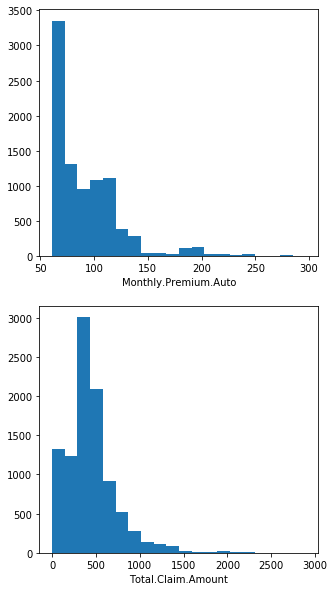

In [198]:
fig, ax = plt.subplots(2, figsize = (5, 10))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.distplot(df[var], bins = 20, kde = False, ax = subplot, hist_kws = {"alpha": 1})

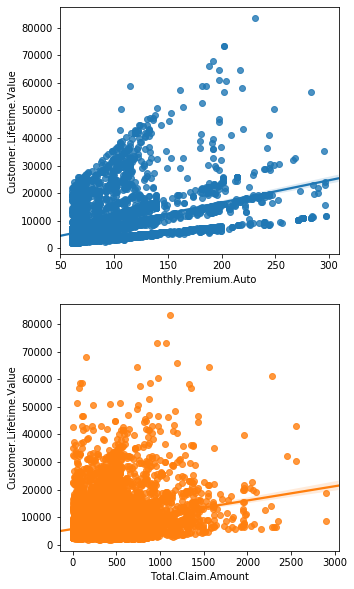

In [199]:
fig, ax = plt.subplots(2, figsize = (5,10))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.regplot(x = var, y = 'Customer.Lifetime.Value', data = df, 
                ax = subplot).set(xlabel = var, ylabel = 'Customer.Lifetime.Value')

In [200]:
df[['Customer.Lifetime.Value', 'Monthly.Premium.Auto']].corr()


,Customer.Lifetime.Value,Monthly.Premium.Auto
Customer.Lifetime.Value,1.0,0.4
Monthly.Premium.Auto,0.4,1.0


In [201]:
df[['Customer.Lifetime.Value', 'Total.Claim.Amount']].corr()


,Customer.Lifetime.Value,Total.Claim.Amount
Customer.Lifetime.Value,1.000,0.222
Total.Claim.Amount,0.222,1.000


In [202]:
print('# of observations : ', df[df['Total.Claim.Amount']> 2500].shape[0])

df1 = df[df['Total.Claim.Amount']> 2500]

df1[['Customer.Lifetime.Value', 'Total.Claim.Amount']].corr()


# of observations :  4


,Customer.Lifetime.Value,Total.Claim.Amount
Customer.Lifetime.Value,1.000,-0.893
Total.Claim.Amount,-0.893,1.000


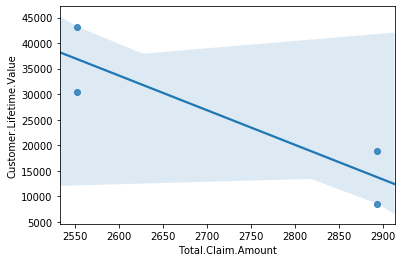

In [203]:
sns.regplot(x = 'Total.Claim.Amount', y = 'Customer.Lifetime.Value', data = df1)


In [204]:
df = df[df['Total.Claim.Amount'] < 2500]

df.shape


(9802, 19)

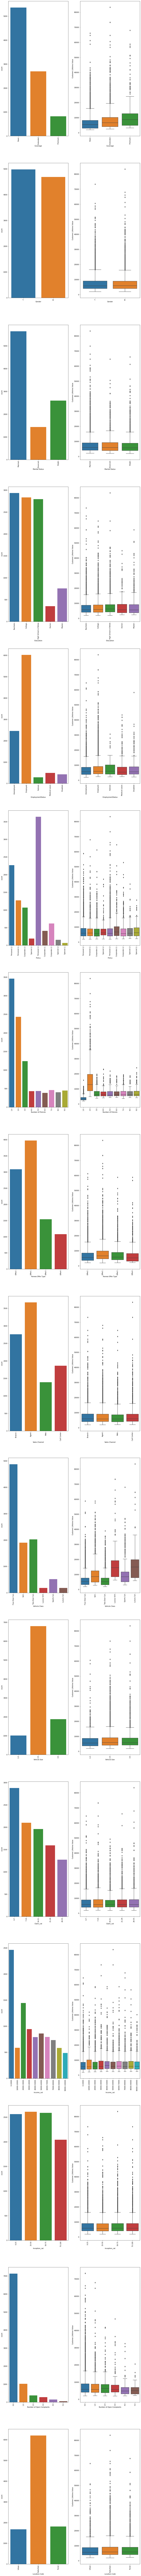

In [205]:
fig, ax = plt.subplots(16, 2, figsize = (15, 300))


for var, [subplotA, subplotB] in zip(cat_cols, ax):
    
    sns.countplot(df[var], ax = subplotA)
    for label in subplotA.get_xticklabels() :
        label.set_rotation(90)
        
    sns.boxplot(x = var, y = 'Customer.Lifetime.Value', data = df, ax = subplotB)
    for label in subplotB.get_xticklabels() :
        label.set_rotation(90)

In [206]:
corr = df.corr()

In [207]:
print (corr['Customer.Lifetime.Value'].sort_values(ascending=False)[:6], '\n')
print (corr['Customer.Lifetime.Value'].sort_values(ascending=False)[-5:])

Customer.Lifetime.Value      1.000
Monthly.Premium.Auto         0.398
Total.Claim.Amount           0.217
Number.of.Policies           0.023
Vehicle.Size                 0.020
Number.of.Open.Complaints   -0.042
Name: Customer.Lifetime.Value, dtype: float64 

Monthly.Premium.Auto         0.398
Total.Claim.Amount           0.217
Number.of.Policies           0.023
Vehicle.Size                 0.020
Number.of.Open.Complaints   -0.042
Name: Customer.Lifetime.Value, dtype: float64


# Model Building

___

We will seperate our independent variables and target variable.

In [208]:
X = df.drop('Customer.Lifetime.Value',  axis = 1)

# dependent variable
y = df["Customer.Lifetime.Value"]


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_imputer = SimpleImputer()
cat_imputer = SimpleImputer(strategy = 'most_frequent')
num_scaler = StandardScaler()


### Function to prepare data

We will write a function to prepare data for following functions.

- Train and Test Split
- Simple Immutation.
- Standardisation

In [210]:
def prepare_data(X, y, split_size = 0.3) :
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = split_size)  
    
    num_imputer.fit(X_train[num_cols])
    cat_imputer.fit(X_train[cat_cols])
    num_scaler.fit(X_train[num_cols])

    print(X_train.shape)
    print(X_test.shape)

    return X_train, X_test, y_train, y_test

In [211]:
X_train, X_test, y_train, y_test = prepare_data(X, y)


(6861, 18)
(2941, 18)


### Function to pre-process data

We will write a function to pre-process data for following functions. This function will be called to transform both train and test datasets.

- Scale the numeric features
- Dummify the categorical features

In [212]:
def preprocess_data(data) :
    
    # impute numerical features
    data[num_cols] = num_imputer.transform(data[num_cols])
    data[cat_cols] = cat_imputer.transform(data[cat_cols])

    # dummify categorical features
    data[cat_cols] = data[cat_cols].astype('category')
    data = pd.get_dummies(data, drop_first = True)

    return data


In [213]:
X_train = preprocess_data(X_train)
X_train.head()
X_train.shape

(6861, 67)

In [214]:
X_test = preprocess_data(X_test)
X_test.head()


,Monthly.Premium.Auto,Total.Claim.Amount,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location.Code_Suburban,Location.Code_Urban,Marital.Status_Married,Marital.Status_Single,Number.of.Open.Complaints_1.0,Number.of.Open.Complaints_2.0,Number.of.Open.Complaints_3.0,Number.of.Open.Complaints_4.0,Number.of.Open.Complaints_5.0,Number.of.Policies_2.0,Number.of.Policies_3.0,Number.of.Policies_4.0,Number.of.Policies_5.0,Number.of.Policies_6.0,Number.of.Policies_7.0,Number.of.Policies_8.0,Number.of.Policies_9.0,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Vehicle.Size_2.0,Vehicle.Size_3.0,Claim_cat_14-21,Claim_cat_21-28,Claim_cat_28-35,Claim_cat_7-14,Inception_cat_25-50,Inception_cat_50-75,Inception_cat_75-100,Income_cat_10000-20000,Income_cat_20000-30000,Income_cat_30000-40000,Income_cat_40000-50000,Income_cat_50000-60000,Income_cat_60000-70000,Income_cat_70000-80000,Income_cat_80000-90000,Income_cat_90000-100000
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8454,89.0,17.559,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8628,71.0,358.986,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
460,62.0,136.263,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1782,128.0,871.485,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
10977,122.0,585.600,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Function for Model Fit & Predict

We will write a function for following functions. 

- Fit the model on train data
- Perform cross-validation when needed
- Predict on train and test data

In [215]:
from sklearn.model_selection import GridSearchCV

def model_building(model, params = None, k = 1) :
    
    if params == None :
        model.fit(X_train, y_train)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X_train), model.predict(X_test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X_train), model.predict(X_test))


In [216]:
from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor()

model, pred_train, pred_test = model_building(knn)


In [226]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt



### Function to Evaluate Model

In [239]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def model_evaluation(actuals, predictions):
    print('\RMSE :')
    rms = sqrt(mean_squared_error(actuals, predictions))
    
    return rms


In [246]:
model_evaluation(y_train, pred_train)

model_evaluation(y_test, pred_test)


\RMSE :
\RMSE :


6710.668415029978

In [241]:
from sklearn import linear_model 
reg = linear_model.LinearRegression() 

model_2, pred_train_2, pred_test_2 = model_building(reg)


In [242]:
model_evaluation(y_train, pred_train_2)

model_evaluation(y_test, pred_test_2)


\RMSE :
\RMSE :


4510.231529606407

In [243]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

model, pred_train_3, pred_test_3 = model_building(dtr)


In [244]:
model_evaluation(y_train, pred_train_3)

model_evaluation(y_test, pred_test_3)


\RMSE :
\RMSE :


5796.554168059665

In [247]:
parameters = {'max_depth' : range(1,20), 
              'min_impurity_decrease' : [0.0001, 0.01]}

model_cv, model_4, pred_train_4, pred_test_4 = model_building(dtr, 
                                                              parameters, 
                                                              20)


In [248]:
model_cv.best_params_


{'max_depth': 4, 'min_impurity_decrease': 0.0001}

In [249]:
model_evaluation(y_train, pred_train_4)

model_evaluation(y_test, pred_test_4)

\RMSE :
\RMSE :


4641.4520835262465

In [250]:
from sklearn.svm import SVR
svr = SVR()
model, pred_train_5, pred_test_5 = model_building(svr)




In [251]:
model_evaluation(y_train, pred_train_5)

model_evaluation(y_test, pred_test_5)

\RMSE :
\RMSE :


7406.125544200194

In [308]:
from sklearn.linear_model import LinearRegression, ElasticNet

In [309]:
parameters={'alpha' : [0.2, 0.5],'l1_ratio' : [0, 0.5, 1]}
model_cv1, model_7, pred_train_7, pred_test_7 = model_building(ElasticNet(), 
                                                                        params=parameters,k=10)


In [310]:
model_evaluation(y_train, pred_train_7)

model_evaluation(y_test, pred_test_7)

\RMSE :
\RMSE :


4513.315976117232

## Loading the Test Part

In [290]:
test = pd.read_csv('C:/Users/TEC/Downloads/test-1574429501088.csv', na_values = '?')

In [291]:
test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.131,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.528,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.030,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200,Four-Door Car,Medsize


In [292]:
test.isnull().sum()

CustomerID                         0
Coverage                           0
Education                          0
EmploymentStatus                   0
Gender                             0
Income                           239
Location.Geo                       0
Location.Code                      0
Marital.Status                     0
Monthly.Premium.Auto              72
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints          0
Number.of.Policies                 0
Policy.Type                       42
Policy                             0
Renew.Offer.Type                   0
Sales.Channel                      0
Total.Claim.Amount                 0
Vehicle.Class                      0
Vehicle.Size                       0
dtype: int64

In [293]:
test.dtypes


CustomerID                         int64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [294]:
bins = [0,7,14,21,28,35]
grp = ["0-7","7-14","14-21","21-28", "28-35"]
test["Claim_cat"] = pd.cut(test["Months.Since.Last.Claim"],bins,labels= grp,include_lowest=True)
test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Claim_cat
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.131,Four-Door Car,Medsize,7-14
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.528,Four-Door Car,Medsize,14-21
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.030,Four-Door Car,Medsize,7-14
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920,Four-Door Car,Medsize,7-14
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200,Four-Door Car,Medsize,7-14


In [295]:
bins = [0,25,50,75,100]
grp = ["0-25","25-50","50-75","75-100"]
test["Inception_cat"] = pd.cut(test["Months.Since.Policy.Inception"],bins,labels= grp,include_lowest=True)
test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Claim_cat,Inception_cat
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.131,Four-Door Car,Medsize,7-14,25-50
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.528,Four-Door Car,Medsize,14-21,0-25
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.030,Four-Door Car,Medsize,7-14,75-100
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920,Four-Door Car,Medsize,7-14,25-50
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200,Four-Door Car,Medsize,7-14,25-50


In [296]:
bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
grp = ["0-10000","10000-20000","20000-30000","30000-40000","40000-50000","50000-60000","60000-70000",
       "70000-80000","80000-90000","90000-100000"]
test["Income_cat"] = pd.cut(test["Income"],bins,labels= grp,include_lowest=True)
test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Claim_cat,Inception_cat,Income_cat
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.131,Four-Door Car,Medsize,7-14,25-50,40000-50000
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.528,Four-Door Car,Medsize,14-21,0-25,20000-30000
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.030,Four-Door Car,Medsize,7-14,75-100,70000-80000
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920,Four-Door Car,Medsize,7-14,25-50,20000-30000
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200,Four-Door Car,Medsize,7-14,25-50,10000-20000


In [297]:
del test['Income']
del test['Policy.Type']
del test['Location.Geo']
del test['Months.Since.Last.Claim']
del test['Months.Since.Policy.Inception']

In [298]:
test = test[test['Total.Claim.Amount'] < 2500]


In [299]:
t_cat_cols = ['Coverage','Gender', 'Marital.Status', 'Education', 'EmploymentStatus' , 'Policy',
            'Number.of.Policies','Renew.Offer.Type', 'Sales.Channel',
            'Vehicle.Class', 'Vehicle.Size', 'Claim_cat','Income_cat', 'Inception_cat','Number.of.Open.Complaints','Location.Code' ]

# create a list for all numerical column names
t_num_cols = df.columns[~df.columns.isin(cat_cols)]
t_num_cols

Index(['Customer.Lifetime.Value', 'Monthly.Premium.Auto',
       'Total.Claim.Amount'],
      dtype='object')

In [300]:
df_test = preprocess_data(test)
df_test.head()

,CustomerID,Monthly.Premium.Auto,Total.Claim.Amount,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,Gender_M,Location.Code_Suburban,Location.Code_Urban,Marital.Status_Married,Marital.Status_Single,Number.of.Open.Complaints_1,Number.of.Open.Complaints_2,Number.of.Open.Complaints_3,Number.of.Open.Complaints_4,Number.of.Open.Complaints_5,Number.of.Policies_2,Number.of.Policies_3,Number.of.Policies_4,Number.of.Policies_5,Number.of.Policies_6,Number.of.Policies_7,Number.of.Policies_8,Number.of.Policies_9,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew.Offer.Type_Offer2,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Vehicle.Size_Medsize,Vehicle.Size_Small,Claim_cat_14-21,Claim_cat_21-28,Claim_cat_28-35,Claim_cat_7-14,Inception_cat_25-50,Inception_cat_50-75,Inception_cat_75-100,Income_cat_10000-20000,Income_cat_20000-30000,Income_cat_30000-40000,Income_cat_40000-50000,Income_cat_50000-60000,Income_cat_60000-70000,Income_cat_70000-80000,Income_cat_80000-90000,Income_cat_90000-100000
0,17,73.0,138.131,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,19,93.0,425.528,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,29,110.0,472.030,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,34,64.0,42.920,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
4,37,79.0,379.200,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0


In [301]:
df_test.isnull().sum()

CustomerID                        0
Monthly.Premium.Auto              0
Total.Claim.Amount                0
Coverage_Extended                 0
Coverage_Premium                  0
Education_College                 0
Education_Doctor                  0
Education_High School or Below    0
Education_Master                  0
EmploymentStatus_Employed         0
EmploymentStatus_Medical Leave    0
EmploymentStatus_Unemployed       0
Gender_M                          0
Location.Code_Suburban            0
Location.Code_Urban               0
Marital.Status_Married            0
Marital.Status_Single             0
Number.of.Open.Complaints_1       0
Number.of.Open.Complaints_2       0
Number.of.Open.Complaints_3       0
Number.of.Open.Complaints_4       0
Number.of.Open.Complaints_5       0
Number.of.Policies_2              0
Number.of.Policies_3              0
Number.of.Policies_4              0
Number.of.Policies_5              0
Number.of.Policies_6              0
Number.of.Policies_7        

In [302]:
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:

y_pred_lr_test= lr.predict(df_test)


In [304]:
df_test['CustomerID'].head()


0    17
1    19
2    29
3    34
4    37
Name: CustomerID, dtype: int64

In [305]:
lr_pred_actual = pd.DataFrame({ 'CustomerID': df_test['CustomerID'],'Customer.Lifetime.Value':(y_pred_lr_test)})

lr_pred_actual.head(10)

,CustomerID,Customer.Lifetime.Value
0,17,108593.918
1,19,341171.214
2,29,376228.758
3,34,46572.397
4,37,301300.536
5,44,414913.279
6,48,311405.532
7,49,630092.484
8,54,498025.893
9,65,17921.884


In [306]:
lr_pred_actual.to_csv('Updated.csv', index=False)


In [164]:
solution = pd.DataFrame({"CustomerID":test["CustomerID"],
                        "Customer.Lifetime.Value":sub1})

In [165]:
solution.to_csv("Linear.csv", index = False)

In [311]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [312]:
lr_test= regressor.predict(df_test)

In [313]:
rf_pred_actual = pd.DataFrame({ 'CustomerID': df_test['CustomerID'],'Customer.Lifetime.Value':(lr_test)})

rf_pred_actual.head(10)

,CustomerID,Customer.Lifetime.Value
0,17,2477.315
1,19,4934.604
2,29,4870.573
3,34,13409.600
4,37,2679.057
5,44,11663.958
6,48,4516.301
7,49,2275.334
8,54,4707.461
9,65,5008.006


In [321]:
rf_pred_actual = rf_pred_actual.to_csv("RandomFo.csv", index = False)

In [322]:
import xgboost as xgb 
my_model = xgb.XGBRegressor()
my_model.fit(X_train,y_train)

[17:48:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Future Scope 

- We can do PCA.
- We can do Stacking and check the results.
- I wanted to do a feature Enginnering part by using groupby we can try that.